In [48]:
# import necessary libs
import numpy as np
import pandas as pd
from scipy import optimize
import scipy as sp
import sympy as sy
import pylab as pl
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)

In [49]:
# Set right font display style
plt.rcParams["font.sans-serif"]=["Times New Roman"]
plt.rcParams["axes.unicode_minus"]=False
# Read file.
# df contains all the data.
df = pd.read_excel('./prep_data.xlsx', header = 0)
df = df[df.columns[1:]]

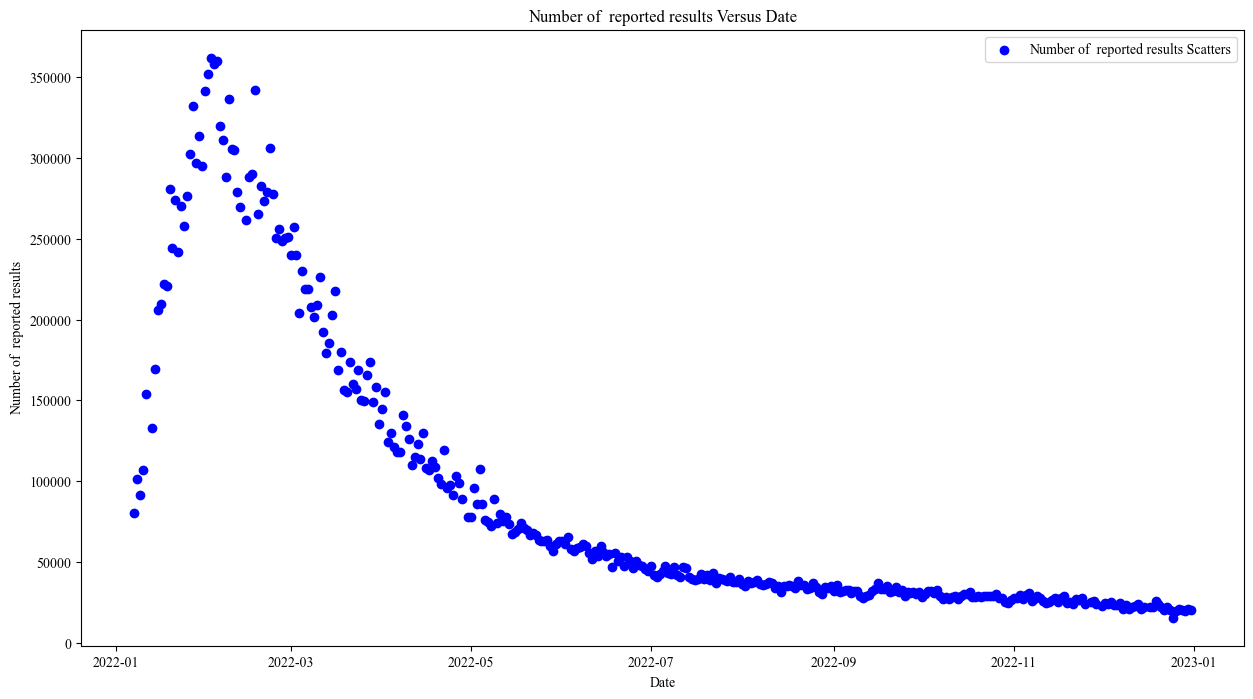

In [54]:
# draw the scatter of the Contest_num
plt.figure( figsize = (15,8) )
plt.scatter(df['Date'], df['Number of  reported results'], color = 'b', label = 'Number of  reported results Scatters')
plt.xlabel('Date')
plt.ylabel('Number of  reported results')
plt.title('Number of  reported results Versus Date')
plt.legend()
plt.savefig('./plots/Number_of_results_scatter.jpg')

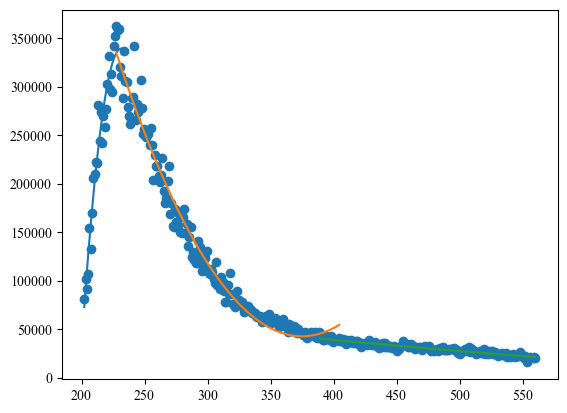

In [71]:
# Trying to piece-wisely curvefit the scatter.
# set up the piece-wise curve fit model
def piecewise_model(x, a0, b0, c0, a1, b1, c1, k, b, x0 = 230, x1 = 398):
    return np.piecewise(x, [x < x0, np.logical_and(x >= x0, x<= x1), x > x1], [lambda x: k*x+b, lambda x: a0*x**2 + b0*x + c0, lambda x: a1*x**2 + b1*x + c1])
xd = np.linspace(df['Contest_num'][0], df['Contest_num'][len(df)-1],len(df))
plt.scatter(xd, df['Number of  reported results'])
p, e = sp.optimize.curve_fit(piecewise_model, xd[0:30], df['Number of  reported results'][0:30])
plt.plot(xd[0:30], piecewise_model(xd[0:30], *p))
p, e = sp.optimize.curve_fit(piecewise_model, xd[25:200], df['Number of  reported results'][25:200])
plt.plot(xd[25:200], piecewise_model(xd[25:200], *p))
p, e = sp.optimize.curve_fit(piecewise_model, xd[184:], df['Number of  reported results'][184:])
plt.plot(xd[184:], piecewise_model(xd[184:], *p))

